In [1]:
#데이터 크롤링 후 좌석현황 사전 구성

from urllib.request import urlopen
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import datetime
import pandas as pd


def get_html(url):
    f = urlopen(url)
    bsObj = BeautifulSoup(f, 'lxml-xml')
    return bsObj


def make_dic(obj):
    a = obj.find_all("A")
    
    list1 = []
    for i in a:
        list1.append(str(i))
    lib_seat = {}
    p = re.compile(r"(?<=>).*(?=</A>)")
    for i in list1:
        a = p.search(i).group()
        if a not in lib_seat:
            lib_seat[a] = {}
    return lib_seat


def cal_all(lib_seat):
    a = obj.find_all("TR")
    b = str(a[3])
    b = b.split("<FONT COLOR=\"blue\">")
    
    p2 = re.compile("(?<=<FONT>-1&gt;)\d+(?=<font>)")
    for k,v in lib_seat.items():
        lib_seat[k]["all"] = 0
    
    for i in range(27):
        if(i%3 == 1):
            c = p2.search(b[i]).group()
            for k,v in lib_seat.items():
                if(lib_seat[k]["all"] == 0):
                    lib_seat[k]["all"] = int(c)
                    break


def cal_now(lib_seat):
    a = obj.find_all("TR")
    b = str(a[3])
    b = b.split("<FONT COLOR=\"blue\">")
    
    p2 = re.compile("(?<=<FONT>-1&gt;)\d+(?=</FONT>)")
    for k,v in lib_seat.items():
        lib_seat[k]["now"] = 0
    
    for i in range(27):
        if(i%3 == 1):
            c = p2.search(b[i]).group()
            for k,v in lib_seat.items():
                if(lib_seat[k]["now"] == 0):
                    lib_seat[k]["now"] = int(c)
                    break
                    
                    
def cal_extra(lib_seat):
    a = obj.find_all("TR")
    b = str(a[3])
    b = b.split("<FONT COLOR=\"blue\">")
    
    p2 = re.compile("\d+(?=</FONT>)")
    for k,v in lib_seat.items():
        lib_seat[k]["extra"] = 0
    
    for i in range(27):
        if(i%3 == 2):
            c = p2.search(b[i]).group()
            for k,v in lib_seat.items():
                if(lib_seat[k]["extra"] == 0):
                    lib_seat[k]["extra"] = int(c)
                    break


if __name__ == '__main__':
    html = "http://libseat.sogang.ac.kr/seat/domian5.asp"
    obj = get_html(html)
    lib_seat = make_dic(obj)
    cal_all(lib_seat)
    cal_now(lib_seat)
    cal_extra(lib_seat)
    
    for k,v in lib_seat.items():
        print("{}의 총 좌석수 : {}, 현재 사용중 좌석 수 : {}, 남은 좌석 수 : {}".format(k,v["all"],v["now"],v["extra"]))

111 일반열람실의 총 좌석수 : 65, 현재 사용중 좌석 수 : 11, 남은 좌석 수 : 54
112 일반열람실의 총 좌석수 : 61, 현재 사용중 좌석 수 : 9, 남은 좌석 수 : 52
113 일반열람실의 총 좌석수 : 66, 현재 사용중 좌석 수 : 23, 남은 좌석 수 : 43
133 일반열람실의 총 좌석수 : 168, 현재 사용중 좌석 수 : 38, 남은 좌석 수 : 130
K관 열람실의 총 좌석수 : 311, 현재 사용중 좌석 수 : 44, 남은 좌석 수 : 267
X관 대학원열람실의 총 좌석수 : 85, 현재 사용중 좌석 수 : 26, 남은 좌석 수 : 59
PA관 열람실의 총 좌석수 : 101, 현재 사용중 좌석 수 : 13, 남은 좌석 수 : 88
J관 일반열람실의 총 좌석수 : 207, 현재 사용중 좌석 수 : 42, 남은 좌석 수 : 165
J관 노트북전용실의 총 좌석수 : 92, 현재 사용중 좌석 수 : 26, 남은 좌석 수 : 66


In [2]:
#DataFrame 구성을 쉽게 하기 위해 raw_data 사전 구성

name_index = []
all_list = []
now_list = []
extra_list = []
percent_list = []

for k in lib_seat.keys():
    name_index.append(k)
    all_list.append(lib_seat[k]['all'])
    now_list.append(lib_seat[k]['now'])
    extra_list.append((lib_seat[k]['extra']))
    percent_list.append(lib_seat[k]['now']/lib_seat[k]['all'])
    
raw_data = {
    'all' :all_list,
    "now" :now_list,
    "extra":extra_list,
    "percent" : percent_list
}

In [3]:
#pandas DF 생성
df = pd.DataFrame(raw_data,index=name_index)
df1 = pd.DataFrame(raw_data["percent"],index=name_index)

In [4]:
df

,all,extra,now,percent
111 일반열람실,65,54,11,0.169231
112 일반열람실,61,52,9,0.147541
113 일반열람실,66,43,23,0.348485
133 일반열람실,168,130,38,0.226190
K관 열람실,311,267,44,0.141479
X관 대학원열람실,85,59,26,0.305882
PA관 열람실,101,88,13,0.128713
J관 일반열람실,207,165,42,0.202899
J관 노트북전용실,92,66,26,0.282609


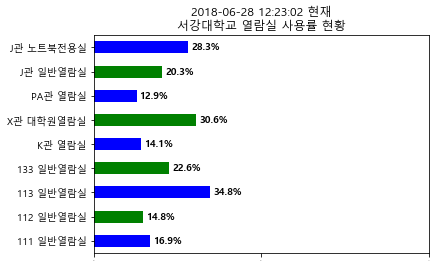

In [5]:
#열람실 사용률 현황 그래프
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
dt = datetime.datetime.now()
nowDatetime = dt.strftime('%Y-%m-%d %H:%M:%S')

df1.plot(xticks=[0,0.5,1],kind="barh",legend=False,color="bg")
plt.title("{} 현재\n서강대학교 열람실 사용률 현황".format(nowDatetime))
plt.xticks(fontsize=0)
i=0
for v in raw_data["percent"]:
    plt.text( v + 0.01, i-0.1 , str(round(v*100,1))+"%", color='k', fontweight='bold')
    i+=1

plt.show()

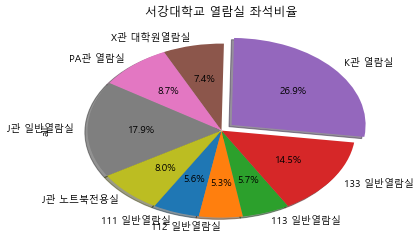

In [6]:
#열람실 좌석비율 그래프
df["all"].plot(kind="pie",legend=False,autopct="%.1f%%",shadow=True,startangle=240,explode=(0,0,0,0,0.1,0,0,0,0))
plt.title("서강대학교 열람실 좌석비율")
plt.show()

In [8]:
#열람실 검색 시스템
print("열람실 리스트")
BOLD_AND_RED = "\033[1;31m"
flag = False
count = 1
for i in lib_seat.keys():
    print("{} : {}".format(count,i))
    count+=1
where = input("어떤 열람실 현황을 알고 싶으신가요?\n ")
while(not flag):
    if not where.isdigit():
        try:
            print(BOLD_AND_RED+"{}은 총 {}석이며 현재 {}석 사용중. {}석 비어있습니다.".format(where,lib_seat[where]['all'],lib_seat[where]['now'],lib_seat[where]['extra']))
            flag = True
        except KeyError:
            print("{}은 없습니다. 올바른 열람실 명을 입력해주세요".format(where))
            where = input("어떤 열람실 현황을 알고 싶으신가요?\n ")


    else:
        try:
            where2 = df1.index[int(where)-1]
            flag = True
            print(BOLD_AND_RED+"{}은 총 {}석이며 현재 {}석 사용중. {}석 비어있습니다.".format(where2,lib_seat[where2]['all'],lib_seat[where2]['now'],lib_seat[where2]['extra']))
        except IndexError:
            print("서강대학교 열람실은 9개입니다, 1 ~ 9까지의 숫자 혹은 이름을 입력해주세요.")
            where = input("어떤 열람실 현황을 알고 싶으신가요?\n ")


열람실 리스트
1 : 111 일반열람실
2 : 112 일반열람실
3 : 113 일반열람실
4 : 133 일반열람실
5 : K관 열람실
6 : X관 대학원열람실
7 : PA관 열람실
8 : J관 일반열람실
9 : J관 노트북전용실
어떤 열람실 현황을 알고 싶으신가요?
 K관 열람실
K관 열람실은 총 311석이며 현재 44석 사용중. 267석 비어있습니다.
